In [1]:
import numpy as np
import cv2, os
import matplotlib.pyplot as plt

In [74]:
processed_img_dir = './front_processed2/'
file_names = os.listdir(processed_img_dir)[:-341]
wvls = np.array([430, 450, 480, 500, 520, 550, 580, 600, 620, 650, 660])

In [75]:
total_img = np.zeros(shape = (len(wvls), 580, 890)) # number of wvls, H, W, channel
g = float(1.2)
size = 3
threshold = 5

for i in range(len(wvls)):
    for fn in file_names:
        if "%snm"%str(wvls[i]) in fn:
            img = cv2.imread(os.path.join(processed_img_dir, fn), cv2.IMREAD_GRAYSCALE)
            black_level = cv2.imread(os.path.join(processed_img_dir, 'pattern_%04d_%snm.png'%(436, str(wvls[i]))), cv2.IMREAD_GRAYSCALE)

            # gamma correction
            img = ((img / 255)**(1/g)) * 255
            black_level = ((black_level / 255)**(1/g)) * 255
            
            # erase black level
            img = img - black_level
            img = np.clip(img, 0., 255.)
            
            mask = img < img.max() - threshold
            img[mask] = 0.

            # max_coord = np.unravel_index(img.argmax(), img.shape)
            # max_coord_H, max_coord_W = max_coord[0], max_coord[1]
            
            # only leave the point
            # new_img[max_coord[0]-size:max_coord[0]+size + 1, max_coord[1]-size:max_coord[1]+ size +1] = 1.

            total_img[i] += img

(<matplotlib.image.AxesImage at 0x19f3cf68fc8>,
 <matplotlib.colorbar.Colorbar at 0x19f3d07a508>)

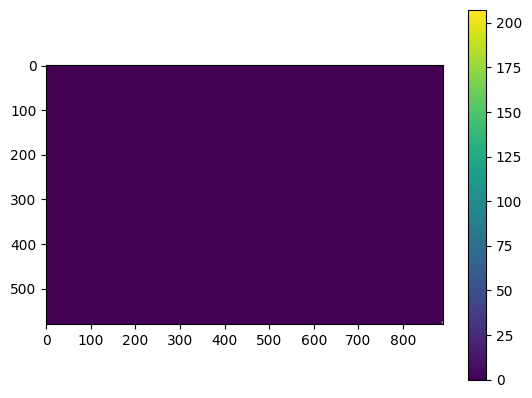

In [60]:
plt.imshow(img), plt.colorbar()
# plt.scatter(279, 29, c = 'red', s= 1)

In [76]:
for i in range(len(wvls)):
    cv2.imwrite('./mid_total_img_%snm.png'%str(wvls[i]), total_img[i] * 10)

In [2]:
homography_dir = './homography'

holder_dir = os.path.join(homography_dir, 'holder.png')
plain_dir = os.path.join(homography_dir, 'plain.png')
wheel_dir = os.path.join(homography_dir, 'wheel.png')

In [17]:
holder_img = cv2.imread(holder_dir)[:,:,::-1] /255.
plain_img = cv2.imread(plain_dir)[:,:,::-1] /255.
wheel_img = cv2.imread(wheel_dir)[:,:,::-1]/255.

(<AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x1db42bbe608>)

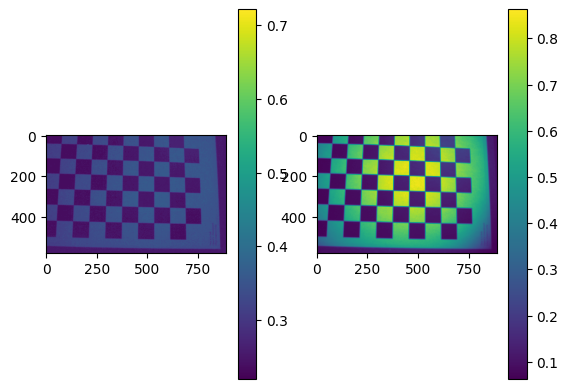

In [18]:
plt.subplot(121), plt.imshow(holder_img[:,:,2]*4), plt.colorbar()
plt.subplot(122), plt.imshow(wheel_img[:,:,2]), plt.colorbar()

In [28]:
total_img = (holder_img[:,:,2]*4 + wheel_img[:,:,2]) / 2

In [29]:
total_img.max()

0.6862745098039216

(<matplotlib.image.AxesImage at 0x1db433f8f08>,
 <matplotlib.colorbar.Colorbar at 0x1db43407cc8>)

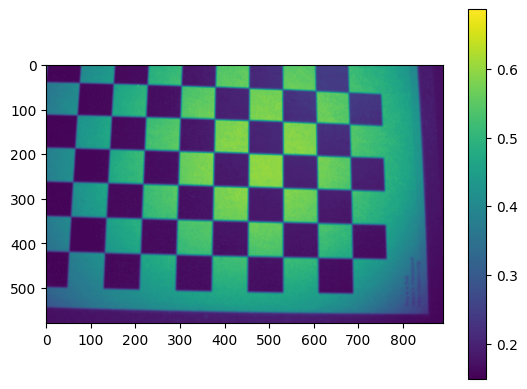

In [31]:
plt.imshow(total_img), plt.colorbar()